# Assignment - Surprise housing

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. A model needs to be created to be used by management to understand how exactly the prices vary with the variables.

## Steps to be followed for Model building

- Data analysis
- Data cleaning and formatting
- Exploratory data analysis
    - Univariant analysis
    - Bi-variant analysis
- Feature selection
- Data preparation for Model creation
    - Train test split
    - Scaling
- Linear regression Model
- Ridge regression Model
- Lasso regression Model    - 

## Library import

In [1]:
import numpy as np
import pandas as pd

## graph plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Metrics
from sklearn.metrics import r2_score, mean_squared_error

## Linear regression Model building
from sklearn.linear_model import LinearRegression

## Lasso regression Model building
from sklearn.linear_model import Lasso

## Ridge regression Model building
from sklearn.linear_model import Ridge

## Cross validation
from sklearn.model_selection import GridSearchCV

## Scalling
from sklearn.preprocessing import StandardScaler

## Train trest split
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Read Data

In [3]:
data = pd.read_csv("train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## 1. Data Analysis

In [4]:
data.shape

(1460, 81)

In [5]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Check data type of columns

In [6]:
data.info()
# data type are correctly assigned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
## Columns with Null values
filtered_data = data.loc[:, data.isnull().sum() != 0]
filtered_data.isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## 2. Data cleaning and formatting

### Missing data correction

In [8]:
## NA indicates no garage, can we set to None to differentiate missing value and Not present
data['GarageFinish'] = data['GarageFinish'].fillna('None')
data['GarageType'] = data['GarageType'].fillna('None')
data['GarageQual'] = data['GarageQual'].fillna('None')
data['GarageCond'] = data['GarageCond'].fillna('None')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

## NA indicates no basement
data['BsmtQual'] = data['BsmtQual'].fillna('None')
data['BsmtCond'] = data['BsmtCond'].fillna('None')
data['BsmtExposure'] = data['BsmtExposure'].fillna('None')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')

## NA indicates no alley
data['Alley'] = data['Alley'].fillna('None')

## NA indicates no fire place
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

## NA indicates no pool
data['PoolQC'] = data['PoolQC'].fillna('None')

## NA indicates no fence
data['Fence'] = data['Fence'].fillna('None')

## NA indicates no Miscellaneous feature
data['MiscFeature'] = data['MiscFeature'].fillna('None')

### Removing columns with null values

In [9]:
df_len = len(data)*0.5
i=0
print('Columns with more than 50% missing values deleted')
for col in data.columns:
    if data[col].isnull().sum() >= df_len:
        i=i+1
        print(i,'.', col)
        del data[col]

Columns with more than 50% missing values deleted


### Removing columns not required for analysis

##### Columns not to be used for analysis

In [10]:
del data['Id'] # primary key
del data['GarageCars'] # Garage area is present

#### Columns with only one type of data

In [11]:
for col in data.columns:
    if len(data[col].value_counts()) == 1:
        print('column deleted ', col, data[col].value_counts())
        del data[col]

##### Columns for more than 50% data missing

In [12]:
df_len = len(data)*0.5
i=0
print('Columns with more than 50% missing values 0')
for col in data.columns:
    if data[col].isnull().sum() >= df_len:
        i=i+1
        print(i,'.', col,'.',data[col].isnull().sum(),'.',round(data[col].isnull().sum()*100/len(data),2),'%')
        del data[col]

Columns with more than 50% missing values 0


### Delete rows with null value

In [13]:
data = data[~data['LotFrontage'].isnull()]
data = data[~data['MasVnrType'].isnull()]
data = data[~data['MasVnrArea'].isnull()]
data = data[~data['Electrical'].isnull()]

In [14]:
data = data[~((data['BsmtExposure'] == 'None') & (data['BsmtFinType1'] != 'None'))]

In [15]:
filtered_data = data.loc[:, data.isnull().sum() != 0]
filtered_data.isnull().sum()

Series([], dtype: float64)

### Check duplicate rows

In [16]:
data[data.duplicated()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

### Set categorical data

In [17]:
data['MSSubClass'] = data['MSSubClass'].astype('category')
data['OverallQual'] = data['OverallQual'].astype('category') 
data['OverallCond'] = data['OverallCond'].astype('category') 
data['MoSold'] = data['MoSold'].astype('category')

### Remove outliner

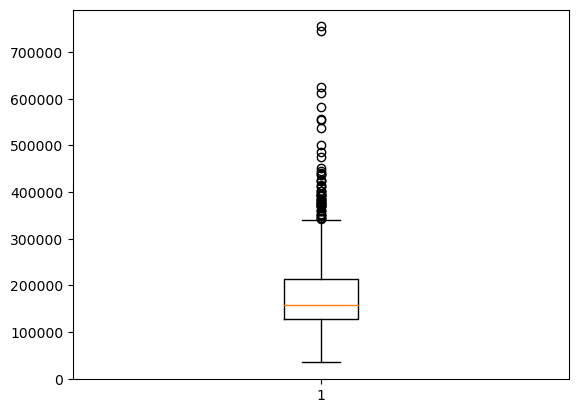

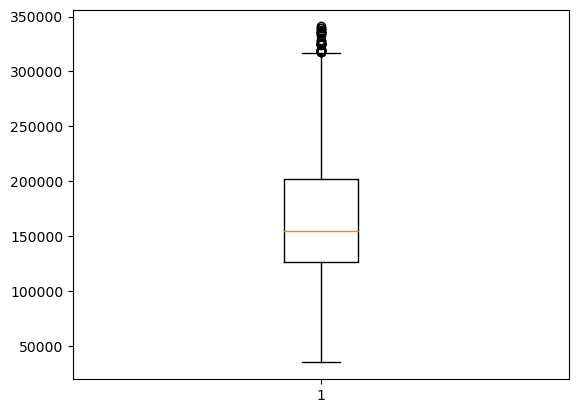

In [18]:
# outlier treatment for price
plt.boxplot(data['SalePrice'])
plt.show()
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['SalePrice'] >= Q1 - 1.5*IQR) & (data['SalePrice'] <= Q3 + 1.5*IQR)]
plt.boxplot(data['SalePrice'])
plt.show()

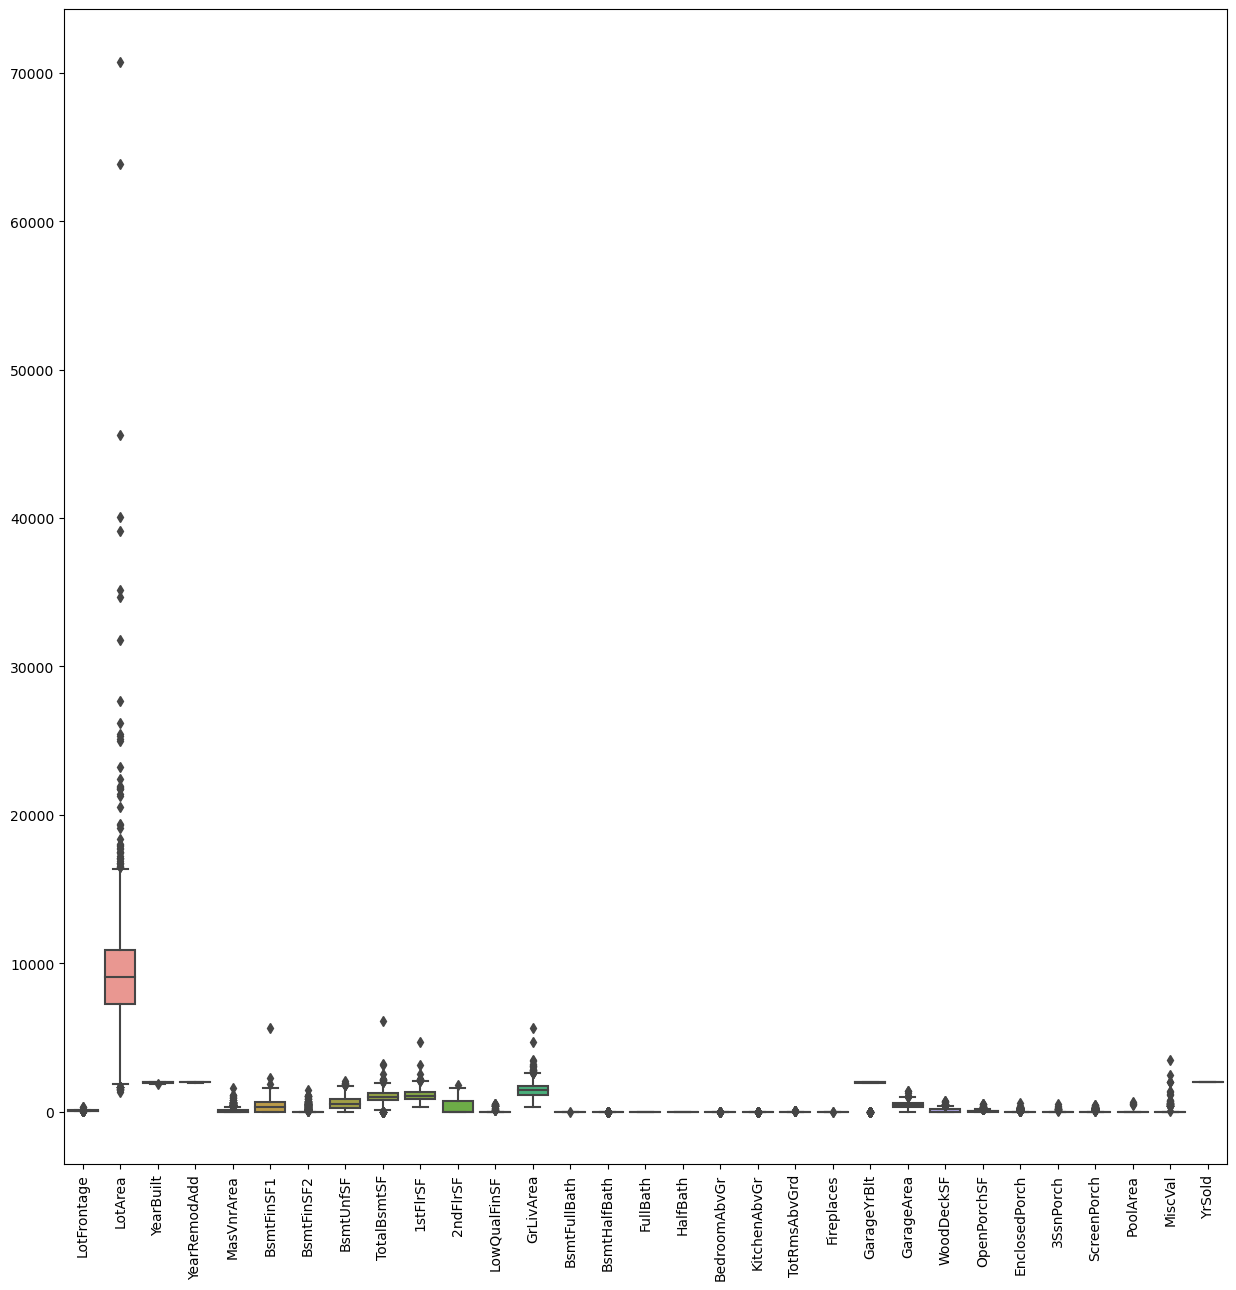

In [19]:
# Box plot before removing outliers
df_num = data.select_dtypes(include=['float64', 'int64'])
df_num = df_num.drop('SalePrice', axis=1)
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [20]:
# Removing 5% of outliers
for col in df_num.columns:
    data[col][data[col] <= data[col].quantile(0.05)] = data[col].quantile(0.05)
    data[col][data[col] >= data[col].quantile(0.95)] = data[col].quantile(0.95)

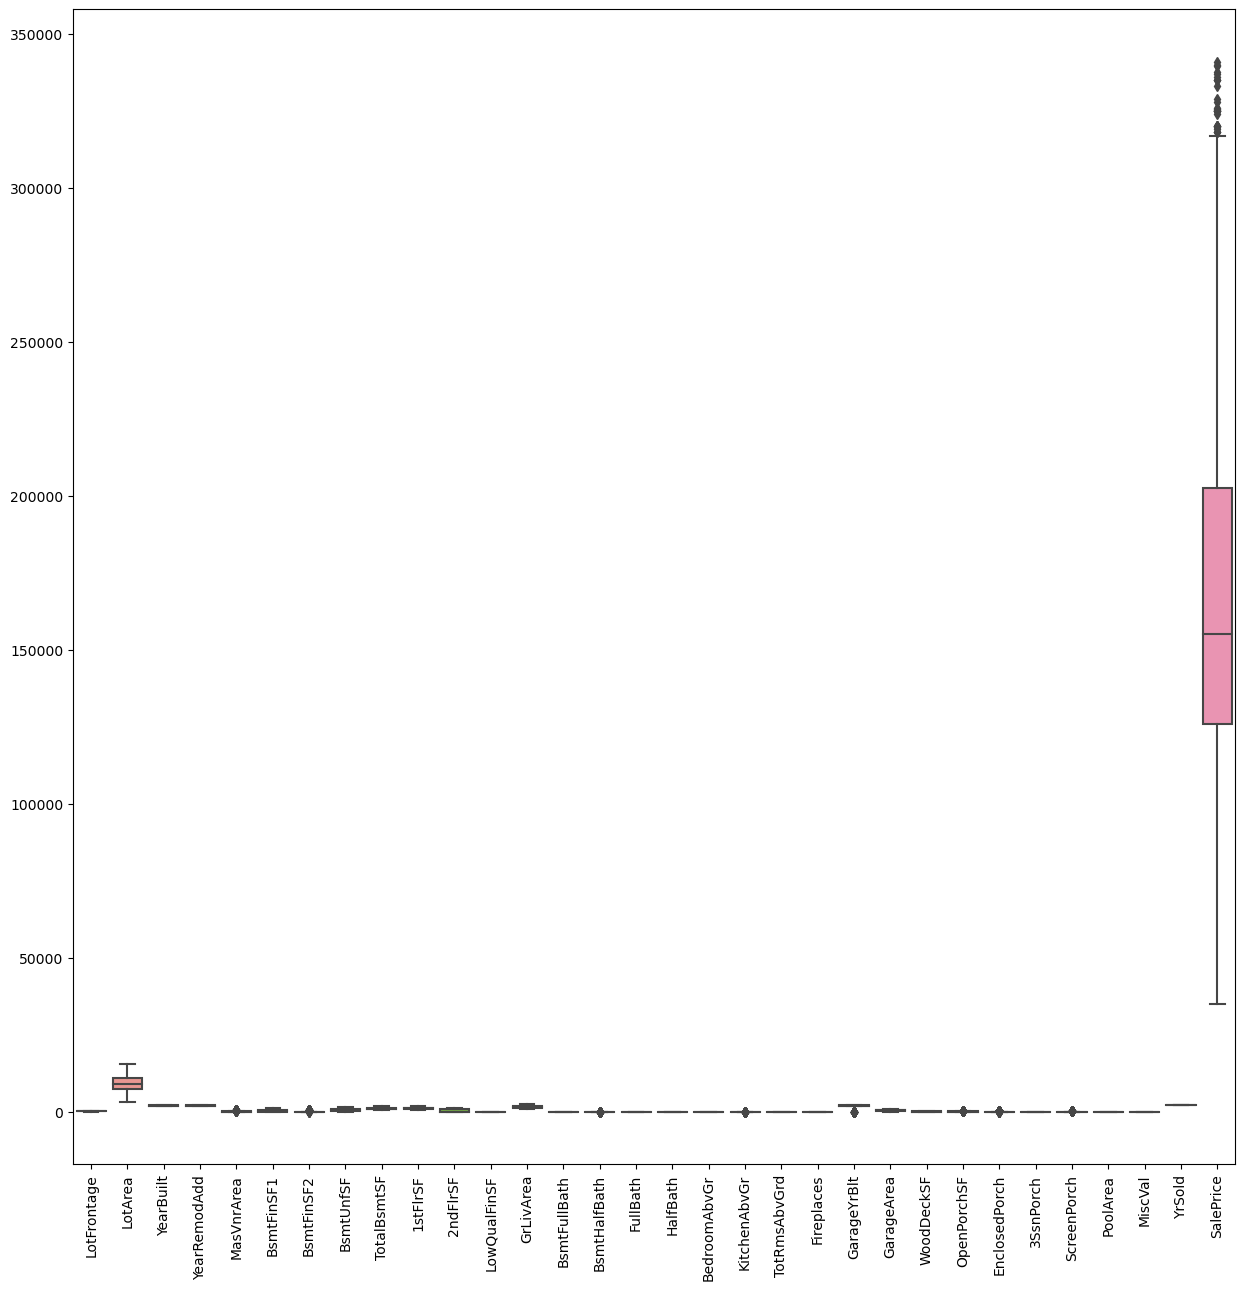

In [21]:
# Box plot after removing outliers
df_num = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

### Delete Columns with more than 90% same values

In [22]:
df_len = len(data)*0.9
i=0
for col in data.columns:
    if data[col].value_counts().iloc[0] >= df_len:
        i=i+1
        print(i,'.', col,'.',data[col].value_counts().iloc[0],'.',round(data[col].value_counts().iloc[0]*100/len(data),2),'%')
        del data[col]

1 . Street . 1132 . 99.56 %
2 . Alley . 1052 . 92.52 %
3 . LandContour . 1029 . 90.5 %
4 . Utilities . 1137 . 100.0 %
5 . LandSlope . 1088 . 95.69 %
6 . Condition2 . 1125 . 98.94 %
7 . RoofMatl . 1122 . 98.68 %
8 . Heating . 1109 . 97.54 %
9 . CentralAir . 1049 . 92.26 %
10 . Electrical . 1028 . 90.41 %
11 . LowQualFinSF . 1137 . 100.0 %
12 . BsmtHalfBath . 1076 . 94.64 %
13 . KitchenAbvGr . 1076 . 94.64 %
14 . Functional . 1055 . 92.79 %
15 . PavedDrive . 1031 . 90.68 %
16 . 3SsnPorch . 1137 . 100.0 %
17 . ScreenPorch . 1049 . 92.26 %
18 . PoolArea . 1137 . 100.0 %
19 . PoolQC . 1132 . 99.56 %
20 . MiscFeature . 1098 . 96.57 %
21 . MiscVal . 1137 . 100.0 %


## Data Formating

### Extracting information

In [23]:
# Extracting number of years from year of build
data['NumYearsBuilt'] = 2023 - data['YearBuilt']
data['NumYearsSold'] = 2023 - data['YrSold']
data['NumYearRemodAdd'] = 2023 - data['YearRemodAdd']
data['NumYearGarageBuilt'] = 2023 - data['GarageYrBlt']

data['NumYearGarageBuilt'] = data['NumYearGarageBuilt'].apply(lambda a:0 if a ==2023 else a)

del data['YearBuilt']
del data['YrSold']
del data['YearRemodAdd']
del data['GarageYrBlt']

### Data update

In [24]:
# Map numbers to month
data['MoSold'] = data['MoSold'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

### Column name update

In [25]:
data.rename(columns = {'MoSold':'MonthSold'}, inplace=True)

## 3. Exploratory Data Analysis

In [26]:
# all numeric (float and int) variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.columns.values.tolist()

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'SalePrice',
 'NumYearsBuilt',
 'NumYearsSold',
 'NumYearRemodAdd',
 'NumYearGarageBuilt']

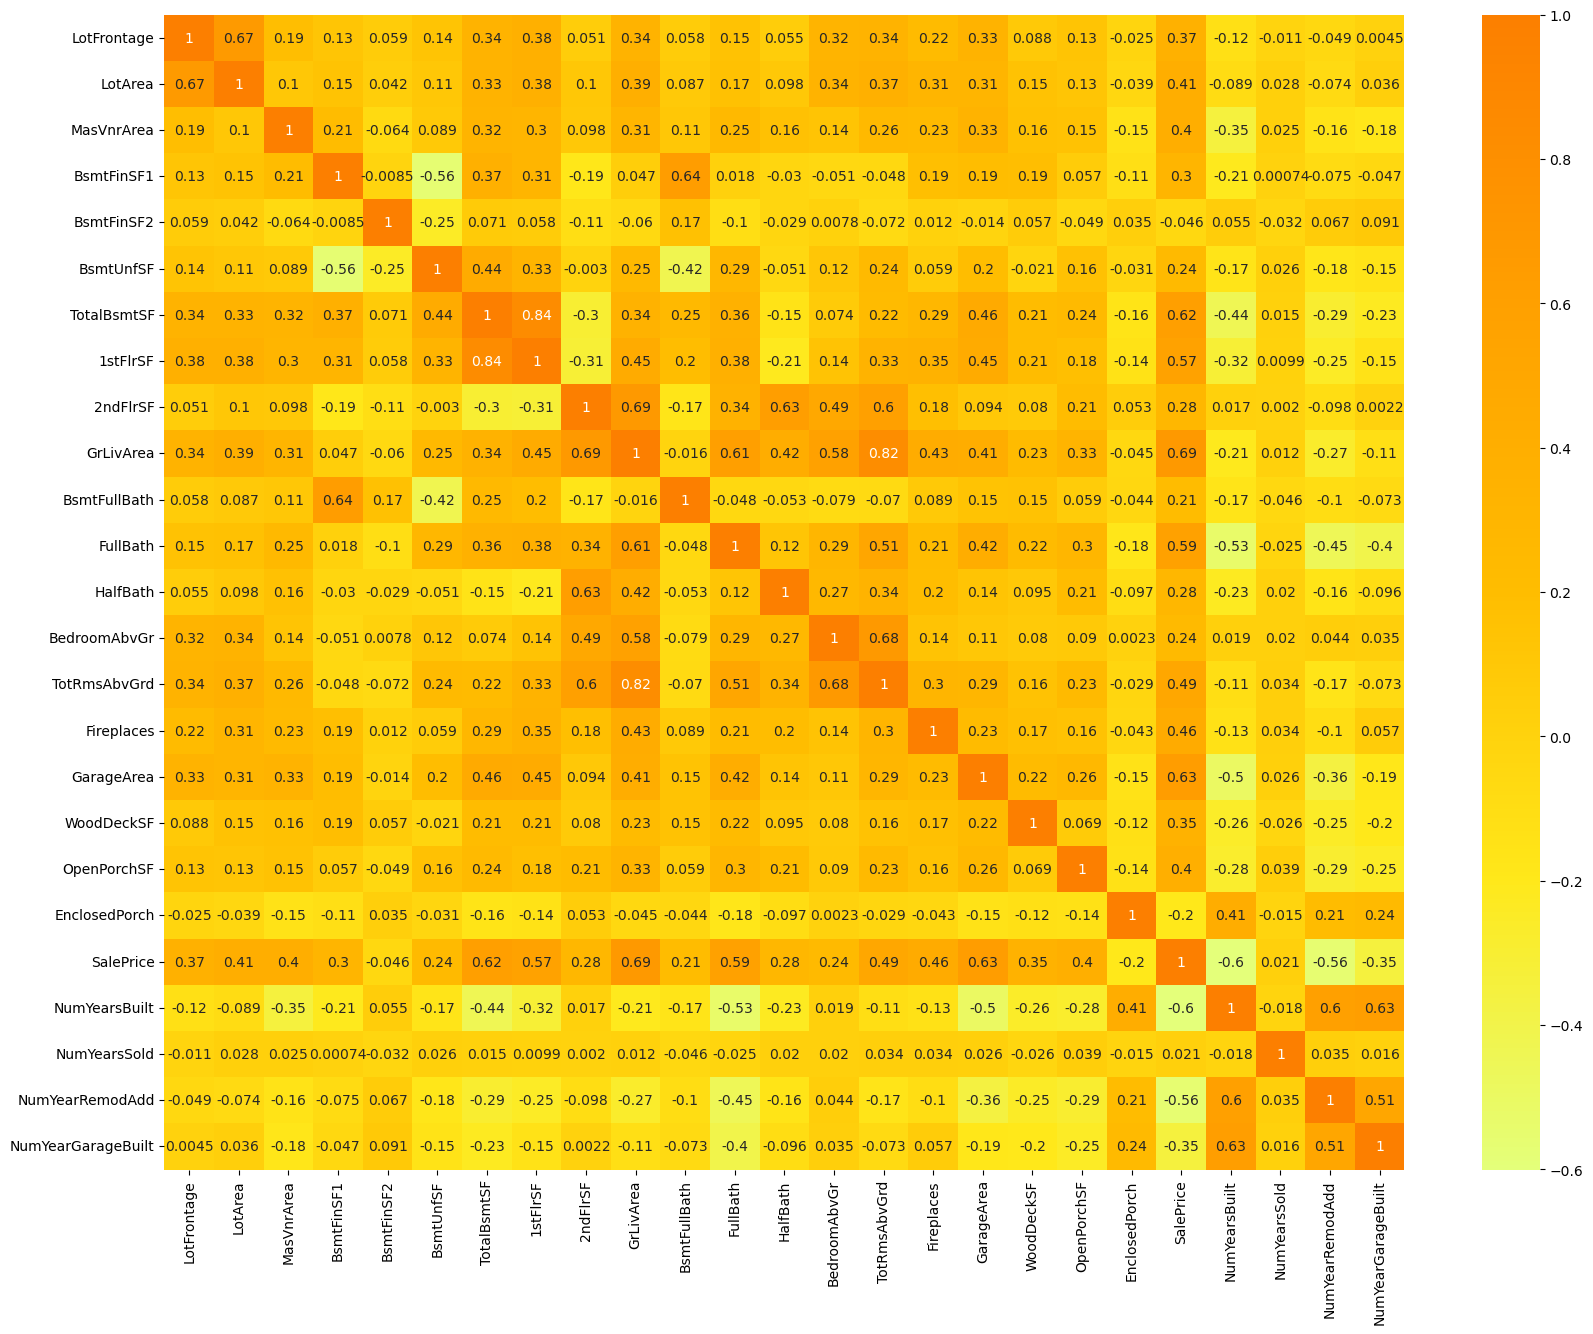

In [27]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20, 15))

# heatmap
sns.heatmap(data_numeric.corr(), cmap="Wistia", annot=True)
plt.show()

For the heat map we can conclude that Sale price is correlated with below features
- Year Built (YearBuilt)
- Year Remodal (YearRemodAdd)
- Total basement surface area (TotalBsmtSF)
- Ground Living area (GrLivArea)
- Garage Area (GarageArea)
- 1st Floor surface area (1stFlrSF)

In [28]:
# Since total living area = LowQualFinSF + 1stFlrSF + 2ndFlrSF
# Hence we can drop LowQualFinSF, 1stFlrSF, 2ndFlrSF
del data['1stFlrSF']

# Since GrLivArea is correlated with TotRmsAbvGrd, hence one of them cal be deleted
del data['TotRmsAbvGrd']

In [29]:
# all numeric (float and int) variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.columns.values.tolist()

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'SalePrice',
 'NumYearsBuilt',
 'NumYearsSold',
 'NumYearRemodAdd',
 'NumYearGarageBuilt']

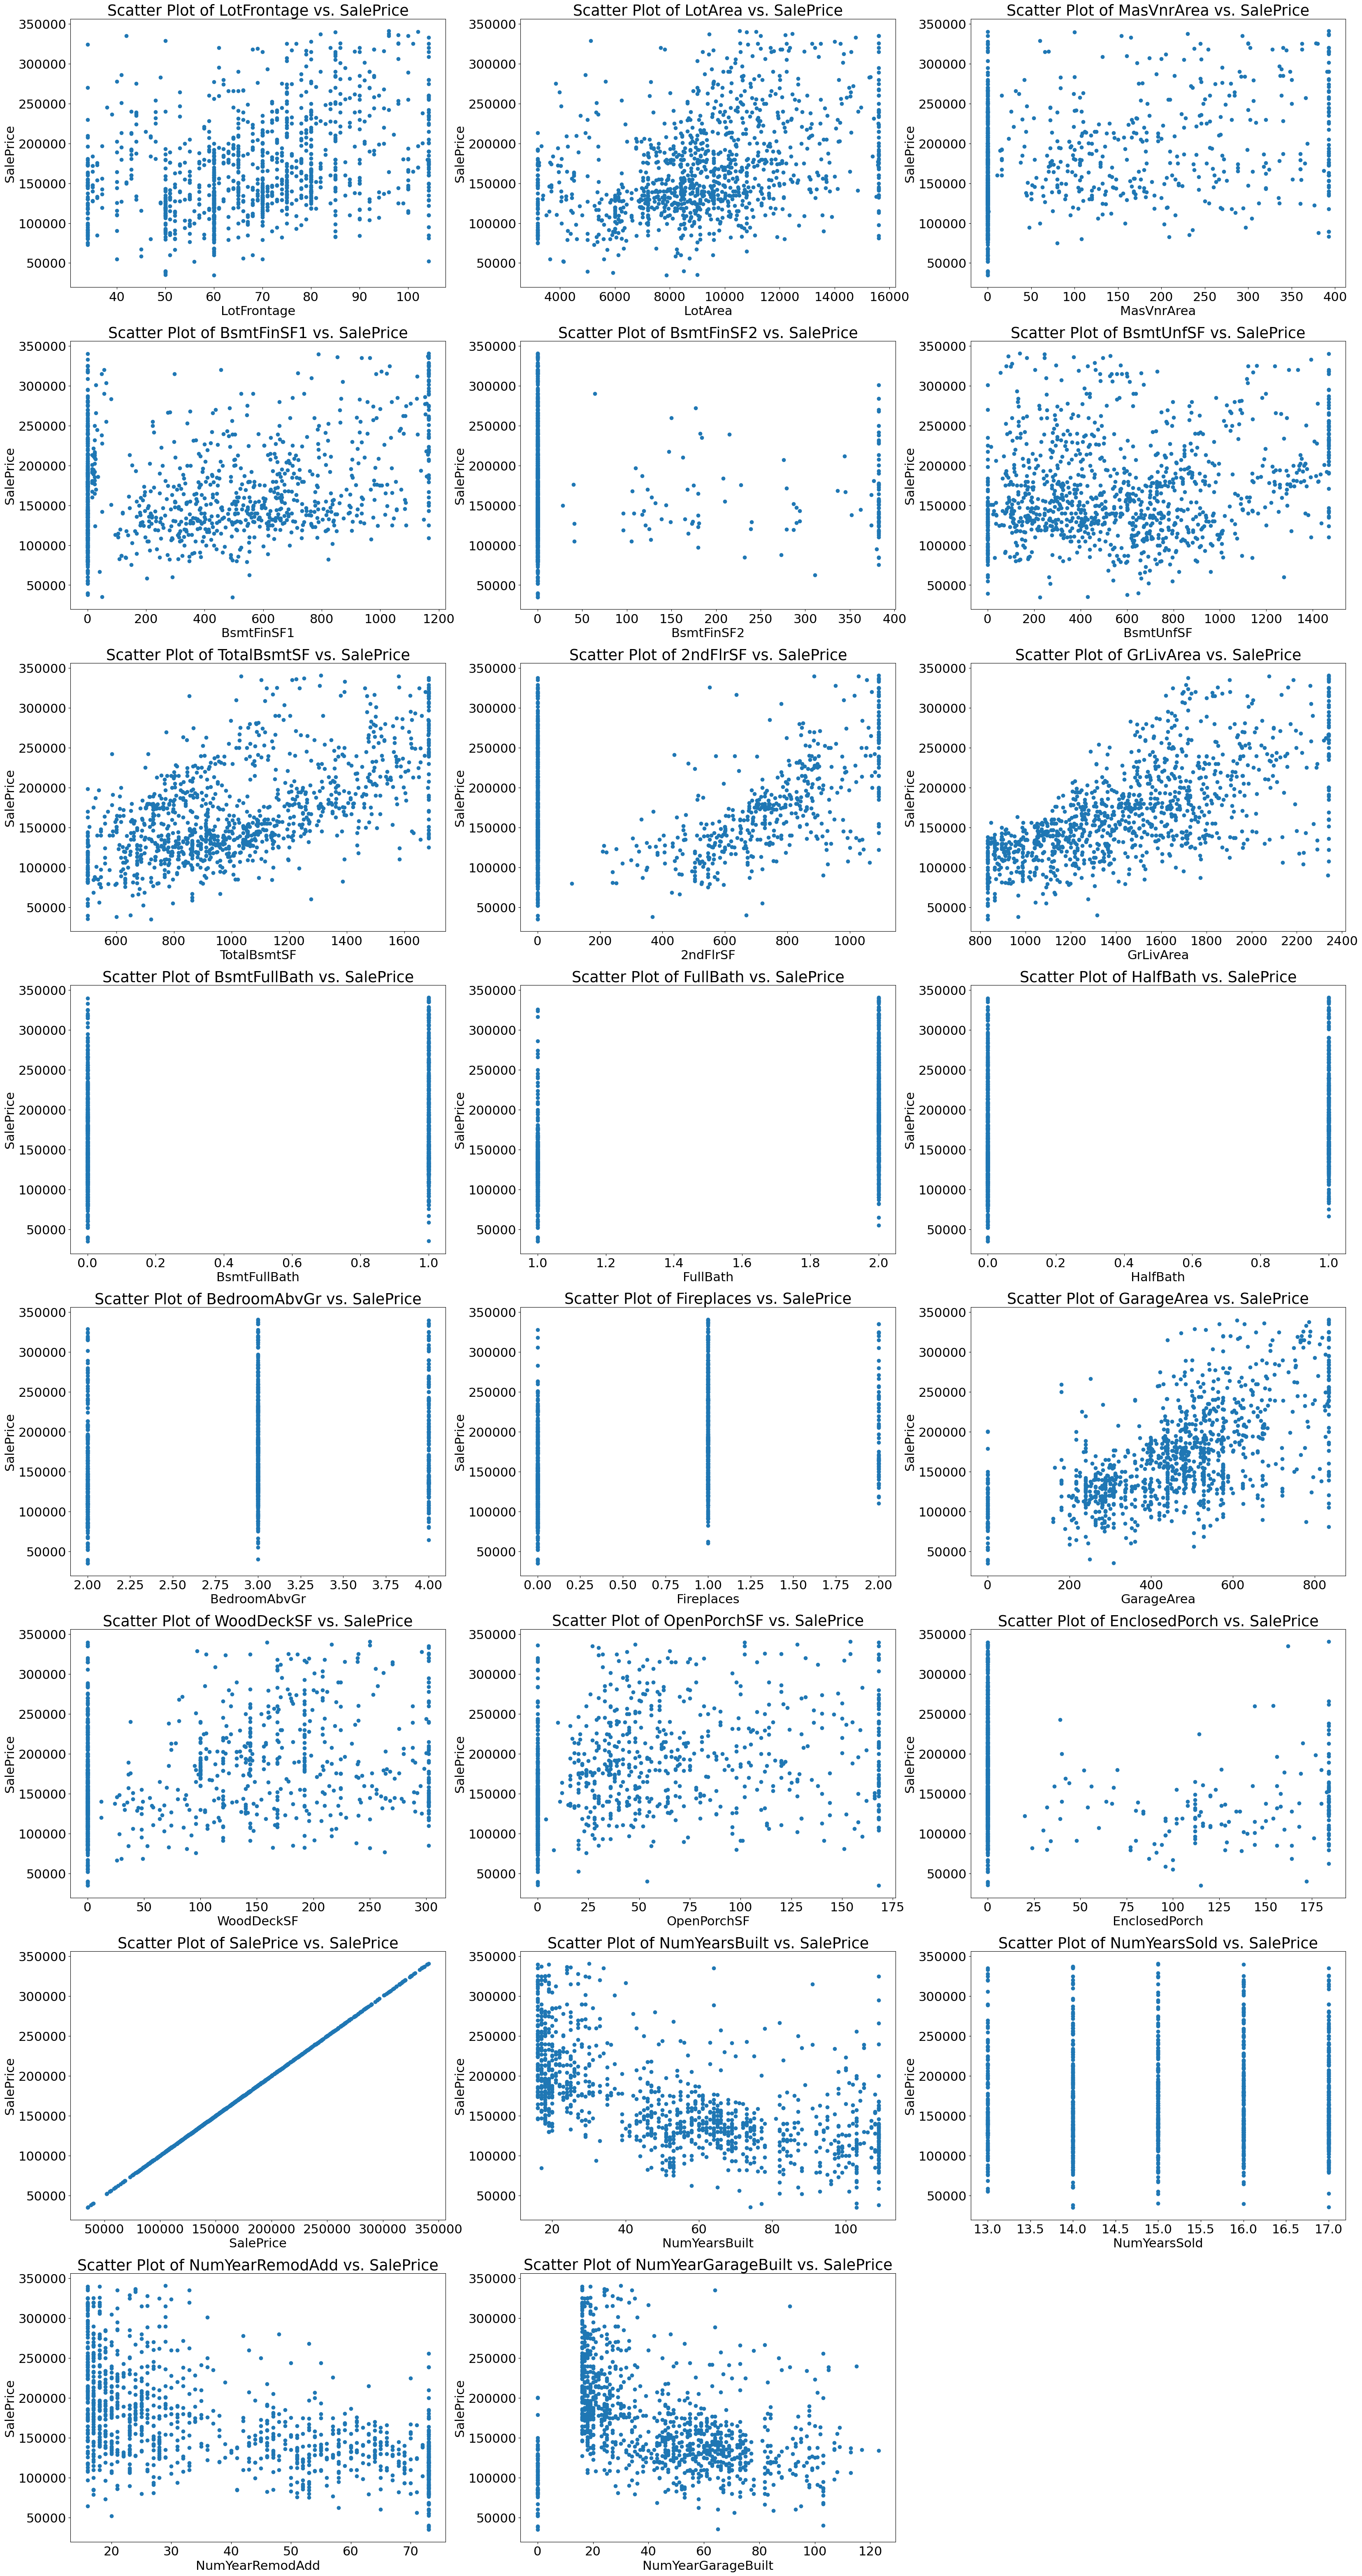

In [30]:
plt.figure(figsize=(40,100))
plt.rcParams.update({'font.size': 22})
a=0
for i in data_numeric.columns:
    a=a+1
    plt.subplot(10,3,a)
    plt.scatter(x=data[i], y=data['SalePrice'])
    plt.xlabel(i)  # Use the column name as the x-axis label
    plt.ylabel('SalePrice')
    plt.title(f'Scatter Plot of {i} vs. SalePrice')
plt.show()

In [31]:
data_categorical = data.select_dtypes(include=['object', 'category'])
plt.figure(figsize=(40,500))
plt.rcParams.update({'font.size': 22})
a=0
for i in data_categorical.columns:
    a=a+1
    plt.subplot(30,2,a)
    grouped_data = data.groupby(i)['SalePrice'].sum().reset_index()
    sns.barplot(x=i, y='SalePrice', data=grouped_data)
    plt.xlabel(i)  # Use the column name as the x-axis label
    plt.ylabel('SalePrice')
    plt.title(f'Bar Plot of {i} vs. No. of Sale')
    plt.xticks(rotation=90)
plt.show()

In [32]:
data_categorical = data.select_dtypes(include=['object', 'category'])
plt.figure(figsize=(40,500))
plt.rcParams.update({'font.size': 22})
a=0
for i in data_categorical.columns:
    a=a+1
    plt.subplot(30,2,a)
    sns.boxplot(x=i, y='SalePrice', data=data)
    plt.xlabel(i)  # Use the column name as the x-axis label
    plt.ylabel('SalePrice')
    plt.title(f'Bar Plot of {i} vs. SalePrice')
    plt.xticks(rotation=90)
plt.show()

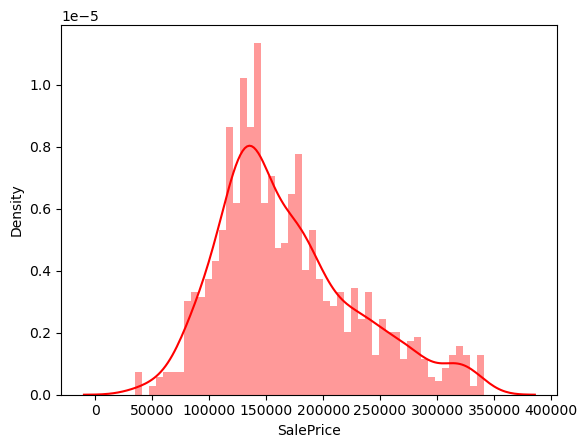

In [33]:
plt.rcParams.update({'font.size': 10})
sns.distplot(data['SalePrice'],bins=50,color='r')
plt.show()

## 4. Data Preparation

In [34]:
# creating dummy variables for categorical variables

# subset all categorical variables
data_categorical = data.select_dtypes(include=['object', 'category'])
data_categorical.head()


MSSubClass MSZoning LotShape LotConfig Neighborhood Condition1 BldgType  \
0         60       RL      Reg    Inside      CollgCr       Norm     1Fam   
1         20       RL      Reg       FR2      Veenker      Feedr     1Fam   
2         60       RL      IR1    Inside      CollgCr       Norm     1Fam   
3         70       RL      IR1    Corner      Crawfor       Norm     1Fam   
4         60       RL      IR1       FR2      NoRidge       Norm     1Fam   

  HouseStyle OverallQual OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story           7           5     Gable     VinylSd     VinylSd   
1     1Story           6           8     Gable     MetalSd     MetalSd   
2     2Story           7           5     Gable     VinylSd     VinylSd   
3     2Story           7           5     Gable     Wd Sdng     Wd Shng   
4     2Story           8           5     Gable     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 HeatingQC KitchenQual FireplaceQu GarageType  \
0          GLQ          Unf        Ex          Gd        None     Attchd   
1          ALQ          Unf        Ex          TA          TA     Attchd   
2          GLQ          Unf        Ex          Gd          TA     Attchd   
3          ALQ          Unf        Gd          Gd          Gd     Detchd   
4          GLQ          Unf        Ex          Gd          TA     Attchd   

  GarageFinish GarageQual GarageCond Fence MonthSold SaleType SaleCondition  
0          RFn         TA         TA  None       Feb       WD        Normal  
1          RFn         TA         TA  None       May       WD        Normal  
2          RFn         TA         TA  None       Sep       WD        Normal  
3          Unf         TA         TA  None       Feb       WD       Abnorml  
4          RFn         TA         TA  None       Dec       WD        Normal

In [35]:
# convert into dummies - one hot encoding
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
1             0             1                  0              1   
2             0             0                  0              0   
3             0             0                  0              0   
4             0             0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 0                     0                    0   
4              0                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhoo

In [36]:
# drop categorical variables 
data = data.drop(list(data_categorical.columns), axis=1)

In [37]:
# concat dummy variables with X
data = pd.concat([data, data_dummies], axis=1)

## Scaling

In [38]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = data.columns
data = pd.DataFrame(scale(data))
data.columns = cols
data.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=238)

## 4.1. Spitting data into Train and Test set

In [39]:
# split into train and test
df_train, df_test = train_test_split(data, train_size=0.7, test_size = 0.3, random_state=100)

### Divide into X and Y sets for model building

In [40]:
## Train set
y_train = df_train.pop('SalePrice')
X_train = df_train

In [41]:
## Test set
y_test = df_test.pop('SalePrice')
X_test = df_test

## 5. Model Building and Evaluation

### 5.1. Linear Regression

#### Feature selection

In [42]:
important_num_cols = list(data_numeric.corr()["SalePrice"][(data_numeric.corr()["SalePrice"]>0.50) | (data_numeric.corr()["SalePrice"]<-0.50)].index)
cat_cols = data_dummies.columns.values.tolist()
# Categories which show variation with respect to SalePrice
cat_cols_original = ['OverallQual','HouseStyle','OverallCond','Neighborhood','MSSubClass','MasVnrType','MoSold']


important_cols = []
important_cols.extend(important_num_cols)
for i in cat_cols_original:
    important_cols.extend(list(filter(lambda x: i in x, cat_cols)))

important_cols.remove('SalePrice')

important_cols_final = []
for i in important_cols:
    if i in X_train.columns.values.tolist():
        important_cols_final.append(i)

X_train_lr = X_train[important_cols_final]
X_test_lr = X_test[important_cols_final]

In [43]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_lr, y_train)

LinearRegression()

In [44]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

0.006300464055839495
[ 0.23283841  0.32379695 -0.00122375  0.0952825  -0.17230037 -0.05327997
  0.01444451  0.03208888  0.07067302  0.11508863  0.14390441  0.22047707
  0.25691896  0.19653836 -0.01863589  0.00358222  0.04170704 -0.03994503
 -0.02931969 -0.07164329  0.05499812  0.09171114  0.03836902  0.09882802
  0.32135284  0.28925583  0.32308666  0.21770733  0.14987621  0.00490817
  0.00325318  0.00682267  0.03266385  0.00507526  0.07318639 -0.03537772
 -0.0082554  -0.02483787 -0.02249522 -0.01872028 -0.01189271  0.00662171
 -0.024333    0.07601585  0.07286437 -0.06800996 -0.02929145 -0.00878701
  0.0049022   0.05630405  0.03606079  0.02306763  0.04886821 -0.00534188
 -0.00125891  0.0122085   0.02874436  0.17676099  0.06007777  0.07710117
 -0.05627983 -0.01676305 -0.04690767 -0.02865547 -0.00190541 -0.02311158
  0.00417135  0.07920323  0.09778968  0.07593303]


In [45]:
lm_coeff_data = pd.DataFrame({'lr_features': X_train_lr.columns.values.tolist(), 'lr_coeff': lm.coef_})

In [46]:
def show_metrics(y_train_i, y_pred_train_i, y_test_i, y_pred_test_i):
    
    # Lets calculate some metrics such as R2 score, RSS and RMSE
   
    metric = []
    r2_train = r2_score(y_train_i, y_pred_train_i)
    print('R2 Train - ',round(r2_train,2))
    metric.append(str(round(r2_train,2)))

    r2_test = r2_score(y_test_i, y_pred_test_i)
    print('R2 Test - ',round(r2_test,2))
    metric.append(str(round(r2_test,2)))

    rss1 = np.sum(np.square(y_train_i - y_pred_train_i))
    print('RSS Train - ',round(rss1,2))
    metric.append(str(round(rss1,2)))

    rss2 = np.sum(np.square(y_test_i - y_pred_test_i))
    print('RSS Test - ',round(rss2,2))
    metric.append(str(round(rss2,2)))
    
    mse_train = mean_squared_error(y_train_i, y_pred_train_i)
    print('MSE Train - ',round(mse_train,2))
    metric.append(str(round(mse_train,2)))

    mse_test = mean_squared_error(y_test_i, y_pred_test_i)
    print('MSE Test - ',round(mse_test,2))
    metric.append(str(round(mse_test,2)))

    return metric

In [47]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lm.predict(X_train_lr)
y_pred_test = lm.predict(X_test_lr)

metric_lr = show_metrics(y_train, y_pred_train,y_test, y_pred_test)



R2 Train -  0.89
R2 Test -  0.86
RSS Train -  81.5
RSS Test -  49.64
MSE Train -  0.1
MSE Test -  0.15


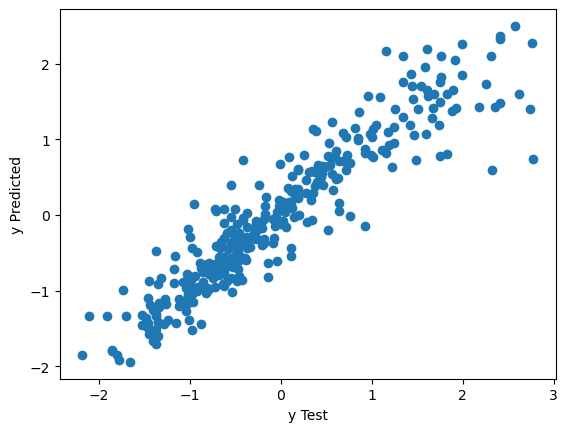

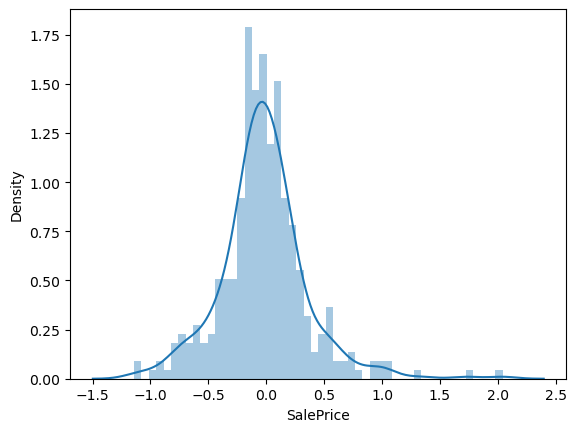

In [48]:
plt.scatter(x = y_test, y = y_pred_test)
plt.xlabel('y Test')
plt.ylabel('y Predicted')
plt.show()
# Check for Residual normality & mean
sns.distplot((y_test-y_pred_test), bins = 50)
plt.show()

## Ridge Regression

In [49]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
print(model_cv.best_params_)

{'alpha': 100}


In [51]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.43274180e-02  7.67415784e-02  1.62394821e-02  7.69990748e-02
  6.82068179e-03  1.16551982e-02  1.43138200e-01  5.80932767e-02
  1.42041700e-01  3.76681707e-02  2.93680913e-02  4.31841590e-02
  3.57145581e-02  3.47810040e-02  7.97502192e-02  4.82648609e-02
  2.63204739e-02 -1.07786152e-02 -5.33597461e-02 -6.77670163e-03
 -5.42664254e-02  6.83998213e-03 -1.01168136e-02  8.27518220e-03
  1.84583815e-02  2.63170131e-03  2.96768967e-02  9.33626593e-03
  2.76785219e-02 -1.67876244e-02 -1.23332502e-03 -1.13774574e-02
 -8.82559459e-03 -2.11393236e-02  1.08798104e-02 -2.83520021e-02
  4.67488200e-02 -1.95397257e-03  2.23928718e-02 -7.99416853e-03
 -6.89527708e-03 -3.35469275e-02 -1.03432611e-02  2.61919990e-02
 -8.31750713e-03 -1.09206937e-02  5.04292875e-03  4.61183590e-03
  1.43828136e-02  1.27776350e-02  1.19452263e-02 -5.65060867e-03
  4.25989517e-02 -4.71142303e-02 -1.25488588e-02 -1.97606556e-02
 -3.71653141e-02 -1.70526111e-02 -1.64901868e-02  9.49418042e-03
 -1.39377953e-02  5.15657

In [52]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge = show_metrics(y_train, y_pred_train,y_test, y_pred_test)

R2 Train -  0.93
R2 Test -  0.87
RSS Train -  51.5
RSS Test -  47.98
MSE Train -  0.06
MSE Test -  0.14


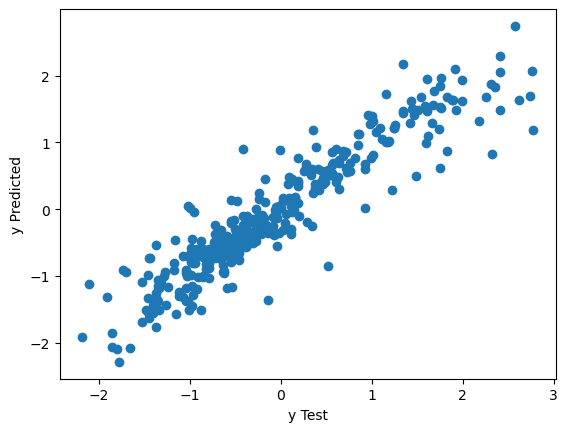

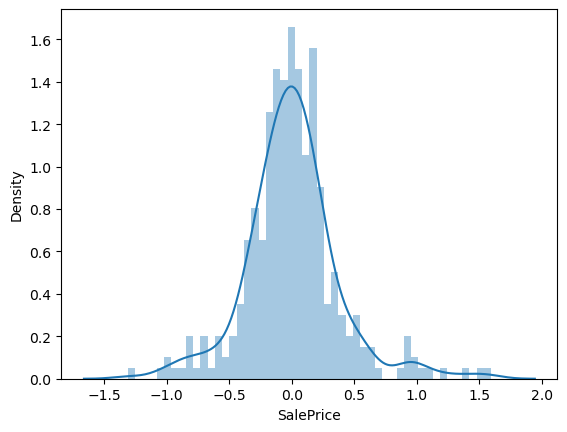

In [53]:
plt.scatter(x = y_test, y = y_pred_test)
plt.xlabel('y Test')
plt.ylabel('y Predicted')
plt.show()
# Check for Residual normality & mean
sns.distplot((y_test-y_pred_test), bins = 50)
plt.show()

## Lasso

In [54]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [56]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [57]:
lasso.coef_

array([ 1.29936639e-02,  9.30976468e-02,  0.00000000e+00,  6.58086545e-02,
        0.00000000e+00, -0.00000000e+00,  1.58881935e-01,  3.15858315e-02,
        2.41384324e-01,  2.77622815e-02,  0.00000000e+00,  2.80250150e-02,
        4.09450362e-03,  3.30293759e-02,  7.63047952e-02,  4.38414383e-02,
        1.93419357e-02, -0.00000000e+00, -1.16487840e-01, -0.00000000e+00,
       -6.24611071e-02,  0.00000000e+00, -7.65573854e-04,  0.00000000e+00,
        2.39240497e-03,  0.00000000e+00,  2.66004116e-02,  0.00000000e+00,
        7.54573086e-03,  0.00000000e+00,  0.00000000e+00, -7.86763301e-03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -3.05284617e-02,
        3.20598084e-02, -0.00000000e+00,  9.80617885e-03, -0.00000000e+00,
       -0.00000000e+00, -2.78830694e-02, -1.98371638e-03,  1.18715534e-02,
       -0.00000000e+00, -2.20668958e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.73567807e-02,  5.66821243e-03,  0.00000000e+00,
        5.34023479e-02, -

In [58]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = show_metrics(y_train, y_pred_train,y_test, y_pred_test)

R2 Train -  0.92
R2 Test -  0.88
RSS Train -  60.27
RSS Test -  44.24
MSE Train -  0.08
MSE Test -  0.13


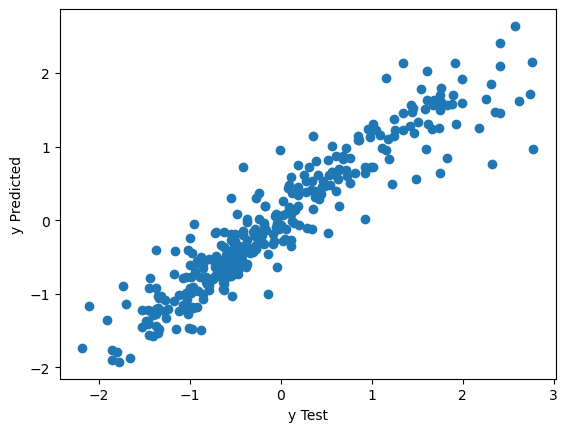

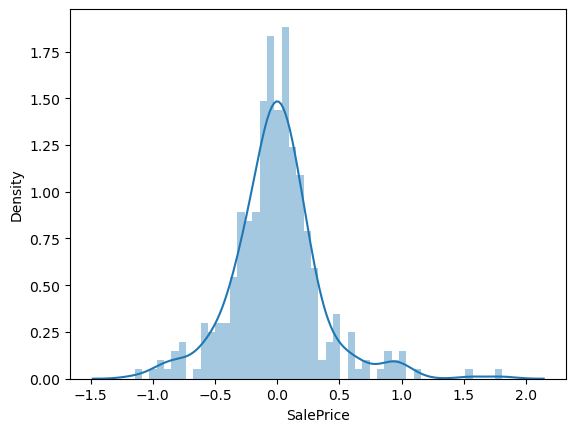

In [59]:
plt.scatter(x = y_test, y = y_pred_test)
plt.xlabel('y Test')
plt.ylabel('y Predicted')
plt.show()
# Check for Residual normality & mean
sns.distplot((y_test-y_pred_test), bins = 50)
plt.show()

## Lets observe the changes in the coefficients after regularization

In [60]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [61]:
lm_coeff = []
for i in X_train.columns.values.tolist():
    if i in lm_coeff_data['lr_features'].tolist():
        coefficient = lm_coeff_data[lm_coeff_data['lr_features'] == i]['lr_coeff'].iloc[0]
        lm_coeff.append(coefficient)
    else:
        lm_coeff.append(0)

In [62]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm_coeff
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas

Linear         Ridge     Lasso
LotFrontage            0.000000  3.432742e-02  0.012994
LotArea                0.000000  7.674158e-02  0.093098
MasVnrArea             0.000000  1.623948e-02  0.000000
BsmtFinSF1             0.000000  7.699907e-02  0.065809
BsmtFinSF2             0.000000  6.820682e-03  0.000000
BsmtUnfSF              0.000000  1.165520e-02 -0.000000
TotalBsmtSF            0.232838  1.431382e-01  0.158882
2ndFlrSF               0.000000  5.809328e-02  0.031586
GrLivArea              0.323797  1.420417e-01  0.241384
BsmtFullBath           0.000000  3.766817e-02  0.027762
FullBath              -0.001224  2.936809e-02  0.000000
HalfBath               0.000000  4.318416e-02  0.028025
BedroomAbvGr           0.000000  3.571456e-02  0.004095
Fireplaces             0.000000  3.478100e-02  0.033029
GarageArea             0.095283  7.975022e-02  0.076305
WoodDeckSF             0.000000  4.826486e-02  0.043841
OpenPorchSF            0.000000  2.632047e-02  0.019342
EnclosedPorch          0.000000 -1.077862e-02 -0.000000
NumYearsBuilt         -0.172300 -5.335975e-02 -0.116488
NumYearsSold           0.000000 -6.776702e-03 -0.000000
NumYearRemodAdd       -0.053280 -5.426643e-02 -0.062461
NumYearGarageBuilt     0.000000  6.839982e-03  0.000000
MSSubClass_30         -0.005342 -1.011681e-02 -0.000766
MSSubClass_40         -0.001259  8.275182e-03  0.000000
MSSubClass_45          0.012208  1.845838e-02  0.002392
MSSubClass_50          0.028744  2.631701e-03  0.000000
MSSubClass_60          0.176761  2.967690e-02  0.026600
MSSubClass_70          0.060078  9.336266e-03  0.000000
MSSubClass_75          0.077101  2.767852e-02  0.007546
MSSubClass_80         -0.056280 -1.678762e-02  0.000000
MSSubClass_85         -0.016763 -1.233325e-03  0.000000
MSSubClass_90         -0.046908 -1.137746e-02 -0.007868
MSSubClass_120        -0.028655 -8.825595e-03 -0.000000
MSSubClass_160        -0.001905 -2.113932e-02 -0.000000
MSSubClass_180        -0.023112  1.087981e-02  0.000000
MSSubClass_190         0.004171 -2.835200e-02 -0.030528
MSZoning_FV            0.000000  4.674882e-02  0.032060
MSZoning_RH            0.000000 -1.953973e-03 -0.000000
MSZoning_RL            0.000000  2.239287e-02  0.009806
MSZoning_RM            0.000000 -7.994169e-03 -0.000000
LotShape_IR2           0.000000 -6.895277e-03 -0.000000
LotShape_IR3           0.000000 -3.354693e-02 -0.027883
LotShape_Reg           0.000000 -1.034326e-02 -0.001984
LotConfig_CulDSac      0.000000  2.619200e-02  0.011872
LotConfig_FR2          0.000000 -8.317507e-03 -0.000000
LotConfig_FR3          0.000000 -1.092069e-02 -0.002207
LotConfig_Inside       0.000000  5.042929e-03  0.000000
Neighborhood_Blueste   0.004908  4.611836e-03  0.000000
Neighborhood_BrDale    0.003253  1.438281e-02  0.000000
Neighborhood_BrkSide   0.006823  1.277764e-02  0.017357
Neighborhood_ClearCr   0.032664  1.194523e-02  0.005668
Neighborhood_CollgCr   0.005075 -5.650609e-03  0.000000
Neighborhood_Crawfor   0.073186  4.259895e-02  0.053402
Neighborhood_Edwards  -0.035378 -4.711423e-02 -0.027393
Neighborhood_Gilbert  -0.008255 -1.254886e-02 -0.000000
Neighborhood_IDOTRR   -0.024838 -1.976066e-02 -0.004350
Neighborhood_MeadowV  -0.022495 -3.716531e-02 -0.009351
Neighborhood_Mitchel  -0.018720 -1.705261e-02 -0.010117
Neighborhood_NAmes    -0.011893 -1.649019e-02 -0.000000
Neighborhood_NPkVill   0.006622  9.494180e-03  0.003353
Neighborhood_NWAmes   -0.024333 -1.393780e-02 -0.000000
Neighborhood_NoRidge   0.076016  5.156579e-02  0.045773
Neighborhood_NridgHt   0.072864  6.016667e-02  0.050648
Neighborhood_OldTown  -0.068010 -3.050328e-02 -0.020556
Neighborhood_SWISU    -0.029291 -2.793392e-02 -0.014535
Neighborhood_Sawyer   -0.008787 -3.057071e-03  0.000000
Neighborhood_SawyerW   0.004902  5.419833e-03 -0.000000
Neighborhood_Somerst   0.056304  2.984450e-02  0.026481
Neighborhood_StoneBr   0.036061  2.113015e-02  0.011794
Neighborhood_Timber    0.023068 -6.027445e-03 -0.000000
Neighborhood_Veenker   0.048868  1.588643e-02  0.

## Conclusion
### Metrics Value of different models

In [63]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric Linear Regression Ridge Regression Lasso Regression
0  R2 Score (Train)              0.89             0.93             0.92
1   R2 Score (Test)              0.86             0.87             0.88
2       RSS (Train)              81.5             51.5            60.27
3        RSS (Test)             49.64            47.98            44.24
4       MSE (Train)               0.1             0.06             0.08
5        MSE (Test)              0.15             0.14             0.13

### Important features in decreasing order as per Lasso regression

In [64]:
lasso_coeff_abs = abs(betas[betas['Lasso']!=0]['Lasso'])

lasso_coeff_abs.sort_values(ascending=False)

GrLivArea                0.241384
TotalBsmtSF              0.158882
OverallQual_8            0.153943
OverallQual_9            0.144183
NumYearsBuilt            0.116488
LotArea                  0.093098
GarageArea               0.076305
OverallQual_7            0.075949
BsmtFinSF1               0.065809
NumYearRemodAdd          0.062461
Neighborhood_Crawfor     0.053402
OverallCond_9            0.050958
Neighborhood_NridgHt     0.050648
OverallCond_3            0.050197
OverallCond_7            0.049655
Neighborhood_NoRidge     0.045773
WoodDeckSF               0.043841
SaleType_New             0.038813
OverallQual_10           0.036007
BsmtFinType1_GLQ         0.035591
Fireplaces               0.033029
Exterior1st_BrkFace      0.032083
MSZoning_FV              0.032060
2ndFlrSF                 0.031586
OverallQual_5            0.030819
MSSubClass_190           0.030528
OverallCond_4            0.029716
HalfBath                 0.028025
LotShape_IR3             0.027883
BsmtFullBath  

# Solving Questions

## Question 1

## Ridge - doubled Alpha

In [65]:
#Fitting Ridge model for alpha = 200 and printing coefficients which have been penalised
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.84196982e-02  7.11272971e-02  2.04111418e-02  6.90720803e-02
  6.57652624e-03  1.40274051e-02  1.21664560e-01  4.57067541e-02
  1.25476889e-01  3.75762649e-02  3.25732809e-02  3.78071972e-02
  3.60155488e-02  3.51522236e-02  7.38369653e-02  4.49539976e-02
  2.81934542e-02 -9.12006490e-03 -3.97708672e-02 -6.89343231e-03
 -5.28166582e-02 -2.06187138e-03 -1.33939662e-02  6.66881393e-03
  1.10856987e-02  3.61438451e-03  2.45765168e-02  1.07258712e-02
  2.26137739e-02 -1.24257962e-02 -1.52592527e-03 -8.23272411e-03
 -6.80657804e-03 -2.16160864e-02  5.29160059e-03 -2.36269023e-02
  3.67160460e-02 -4.64555191e-03  1.67266641e-02 -1.35289738e-02
 -7.09344864e-03 -3.18372283e-02 -1.35001193e-02  2.47432029e-02
 -7.60292982e-03 -8.24245935e-03  2.89754522e-03  3.31141165e-03
  8.71335957e-03  1.29959796e-02  1.35527935e-02 -7.85865265e-03
  4.08078474e-02 -4.03653109e-02 -1.51657465e-02 -1.79627500e-02
 -3.22923037e-02 -1.42061598e-02 -1.43043486e-02  8.32924656e-03
 -9.08222264e-03  4.76642

In [66]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge_2 = show_metrics(y_train, y_pred_train,y_test, y_pred_test)

R2 Train -  0.93
R2 Test -  0.87
RSS Train -  56.63
RSS Test -  46.6
MSE Train -  0.07
MSE Test -  0.14


## Lasso - doubled Alpha

In [67]:
#Fitting Lasso model for alpha = 0.02 and printing coefficients which have been penalised

alpha =0.02

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.02)

In [68]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso_2 = show_metrics(y_train, y_pred_train,y_test, y_pred_test)

R2 Train -  0.9
R2 Test -  0.88
RSS Train -  73.3
RSS Test -  43.96
MSE Train -  0.09
MSE Test -  0.13


In [69]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric_ridge_2, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso_2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric Ridge Regression Lasso Regression
0  R2 Score (Train)             0.93              0.9
1   R2 Score (Test)             0.87             0.88
2       RSS (Train)            56.63             73.3
3        RSS (Test)             46.6            43.96
4       MSE (Train)             0.07             0.09
5        MSE (Test)             0.14             0.13
6      RMSE (Train)              NaN              NaN
7       RMSE (Test)              NaN              NaN

In [70]:
# Creating a table which contain all the coeff

betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

lasso_coeff_abs = betas[betas['Lasso']!=0]
lasso_coeff_abs['Lasso'] = abs(lasso_coeff_abs['Lasso']) 
final_coeff_sorted = lasso_coeff_abs.sort_values(by='Lasso', ascending=False)['Lasso']
final_coeff_sorted

GrLivArea               0.268676
OverallQual_8           0.154535
TotalBsmtSF             0.145562
OverallQual_9           0.141402
NumYearsBuilt           0.091870
LotArea                 0.089719
NumYearRemodAdd         0.086352
GarageArea              0.081175
OverallQual_7           0.071871
BsmtFinSF1              0.060900
Neighborhood_Crawfor    0.052592
OverallCond_3           0.041782
Neighborhood_NridgHt    0.040893
Fireplaces              0.038426
BsmtFinType1_GLQ        0.035481
WoodDeckSF              0.035143
MSSubClass_60           0.034901
OverallCond_9           0.034786
Neighborhood_NoRidge    0.034751
OverallCond_7           0.031340
Neighborhood_Somerst    0.028854
OverallCond_4           0.025921
LotShape_IR3            0.024962
Exterior1st_BrkFace     0.024784
OverallQual_5           0.024383
BsmtFullBath            0.021251
HalfBath                0.020593
ExterQual_Gd            0.019395
OpenPorchSF             0.018463
OverallQual_10          0.017656
BsmtExposu

## Question 3

In [71]:
s = set()
X_train_col =[]
for i in final_coeff_sorted.index:
    if len(s) == 5:
        break
    else:
        if i.split('_')[0] not in s:
            s.add(i.split('_')[0])
            
for i in s:
    X_train_col.extend(list(filter(lambda x: i in x, X_train)))


In [72]:
X_train_col

['NumYearsBuilt',
 'LotArea',
 'TotalBsmtSF',
 'GrLivArea',
 'OverallQual_2',
 'OverallQual_3',
 'OverallQual_4',
 'OverallQual_5',
 'OverallQual_6',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10']

In [73]:
s

{'GrLivArea', 'LotArea', 'NumYearsBuilt', 'OverallQual', 'TotalBsmtSF'}

In [74]:
X_train_2 = X_train.drop(columns=X_train_col)

In [75]:
X_test_2 = X_test.drop(columns=X_train_col)

In [76]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_2, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [78]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_2, y_train) 

Lasso(alpha=0.01)

In [79]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_2)
y_pred_test = lasso.predict(X_test_2)

metric_lasso_3 = show_metrics(y_train, y_pred_train,y_test, y_pred_test)

R2 Train -  0.89
R2 Test -  0.85
RSS Train -  83.87
RSS Test -  53.54
MSE Train -  0.11
MSE Test -  0.16


In [80]:
# Creating a table which contain all the coeff

betas = pd.DataFrame(index=X_train_2.columns)
betas.rows = X_train_2.columns
betas['Lasso'] = lasso.coef_

lasso_coeff_abs = betas[betas['Lasso']!=0]
lasso_coeff_abs['Lasso'] = abs(lasso_coeff_abs['Lasso']) 
lasso_coeff_abs.sort_values(by='Lasso', ascending=False)['Lasso']


BsmtFinSF1              0.242707
BsmtUnfSF               0.200300
2ndFlrSF                0.141060
GarageArea              0.136414
NumYearRemodAdd         0.105482
Neighborhood_NridgHt    0.101916
ExterQual_TA            0.090210
Neighborhood_Somerst    0.089182
Fireplaces              0.085859
KitchenQual_TA          0.081572
LotFrontage             0.079806
BsmtQual_TA             0.075238
BedroomAbvGr            0.073145
Neighborhood_NoRidge    0.070060
WoodDeckSF              0.060472
LotShape_IR3            0.056624
KitchenQual_Gd          0.053130
BsmtFinType1_GLQ        0.051389
OverallCond_3           0.049057
Neighborhood_Crawfor    0.046826
Exterior1st_BrkFace     0.044800
FullBath                0.043528
Neighborhood_StoneBr    0.042488
BsmtFinSF2              0.041298
RoofStyle_Gable         0.039933
SaleType_CWD            0.037759
Neighborhood_MeadowV    0.037573
BsmtExposure_Gd         0.036203
Neighborhood_Edwards    0.035819
HalfBath                0.035614
LotConfig_